# Task 4.9
# Part 2

### Step 1 - Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data

In [19]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [21]:
path = '/Users/wehadiwood/Desktop/Instacart Basket Analysis'

In [25]:
# Import the most up-to-date data
ords_prods_customers_merge =pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_aggregated.pkl'))

### Step 2 - If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

### Step 3 - Create a histogram of the “order_hour_of_day” column

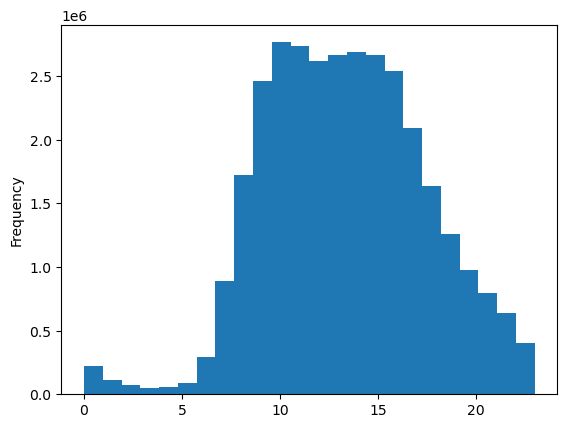

In [29]:
hist = ords_prods_customers_merge['order_hour_of_day'].plot.hist(bins = 24)

### Step 4 - The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

In [33]:
ords_prods_customers_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 25 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                object  
 3   order_number            int64   
 4   order_dow               int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  match                   category
 15  first_name              object  
 16  last_name               object  
 17  gender                  object  
 18  state                   object  
 19  age                     int64   
 20  date_joined             object  
 21  n_depe

In [35]:
def label_loyalty(x):
    if x <= 10:
        return 'New Customer'
    elif x <= 40:
        return 'Regular Customer'
    else:
        return 'Loyal Customer'

ords_prods_customers_merge['loyalty_flag'] = ords_prods_customers_merge['order_number'].apply(label_loyalty)

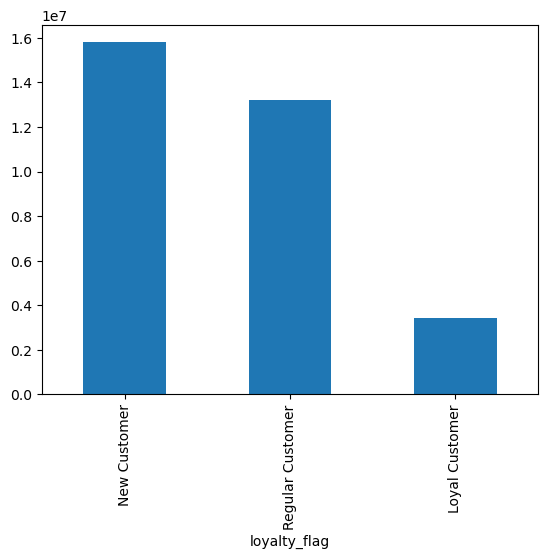

In [37]:
bar = ords_prods_customers_merge['loyalty_flag'].value_counts().plot.bar()

### Step 5 - Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [40]:
# Create a random sample 
np.random.seed(4)

In [42]:
# Sampling Data 70/30
dev = np.random.rand(len(ords_prods_customers_merge)) <= 0.7

In [46]:
# Store 70% of the sample in the dataframe big
big = ords_prods_customers_merge[dev]

In [45]:
# Store 30% of the sample in the dataframe small
small = ords_prods_customers_merge[~dev]

In [49]:
# Checking the totals
len(ords_prods_customers_merge)

32434212

In [51]:
len(big) + len( small)

32434212

In [53]:
# A new dataframe that contains only the "prices" and "order_hour_of_day" columns from small subset
df_2 = small[['order_hour_of_day','prices']]

In [55]:
df_2

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0
...,...,...
32434188,12,2.3
32434191,12,1.3
32434199,12,6.4
32434204,12,11.5


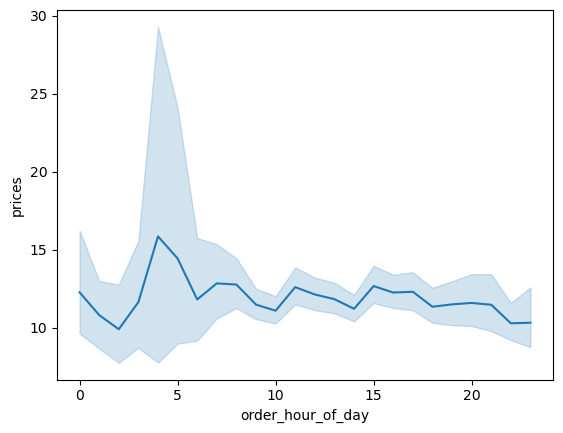

In [58]:
# Create the line chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

### Step 6 - Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns

### Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [60]:
# Create a new dataframe that contains only the "age" and "n_dependants" columns from small subset 
df_3 = small[['age','n_dependants']]

In [62]:
df_3

,age,n_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32434188,74,3
32434191,74,3
32434199,74,3
32434204,74,3


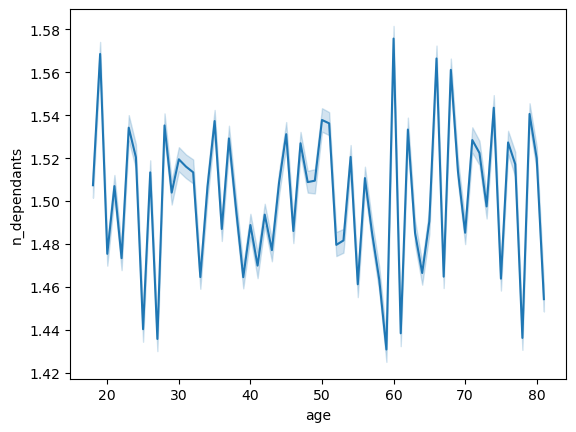

In [64]:
# Create the line chart
line_2 = sns.lineplot(data = df_3, x = 'age',y = 'n_dependants')

### Step 7 - You’ll also need to explore whether there’s a connection between age and spending power (income)

### Step 7 - You’ll also need to explore whether there’s a connection between age and spending power (income)

In [69]:
# Create a new dataframe that contains only the "age" and "income" columns from small subset 
df_4 = small[['age','income']]

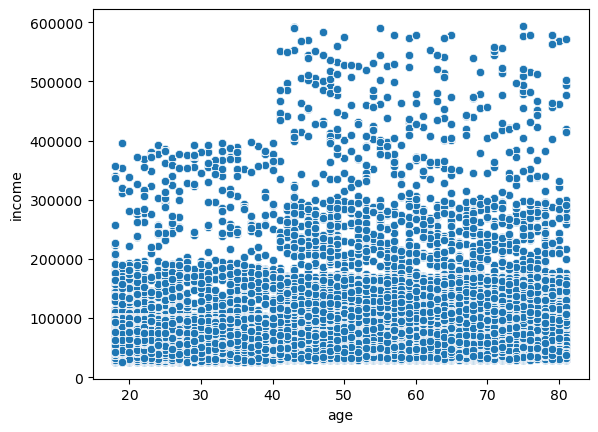

In [71]:
# Create a scatterplot
scatterplot = sns.scatterplot(data = df_4, x = 'age', y = 'income')

### Step 8 - Export your visualizations as “.png” files in your relevant project folder

In [74]:
# Export Histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [76]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [78]:
# Export Line chart - expenditure (the “prices” column) depending on the hour of the day
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'expenditure_over_hours_of_day.png'))

In [80]:
# Export Line chart - connections between age and number of dependents
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_and_n_dependents.png'))

In [82]:
# Export scatterplot - connection between age and spending power (income)
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_spending_power.png'))